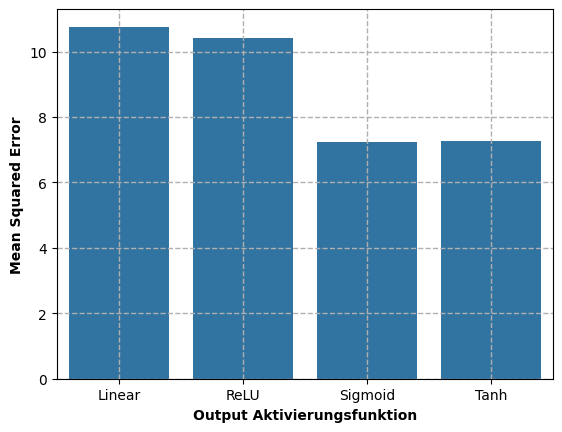

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

#sns.set_theme(rc={'figure.figsize':(15/2.54,8/2.54)})

# Load the data
df = pd.read_csv('activation.csv')

df['output_activation'] = df['output_activation'].replace('linear', 'Linear')
df['output_activation'] = df['output_activation'].replace('sigmoid', 'Sigmoid')
df['output_activation'] = df['output_activation'].replace('tanh', 'Tanh')
df['output_activation'] = df['output_activation'].replace('softmax', 'Softmax')
df['output_activation'] = df['output_activation'].replace('<keras.src.layers.activation.relu.ReLU object at 0x7cc0706d24d0>', 'ReLU')

filtered = df
filtered = df.query("output_activation != 'Softmax'")

metrics = ['mean_squared_error', 'mean_absolute_error']
#print(filtered)

g = sns.barplot(data=filtered, x='output_activation', y='root_mean_squared_error')
plt.ylabel('Mean Squared Error', fontweight='bold')
plt.xlabel('Output Aktivierungsfunktion', fontweight='bold')
g.grid(True, which='both', linestyle='--', linewidth=1)

plt.savefig('activation_selection.pdf', bbox_inches='tight', pad_inches=0.2, format='pdf')
plt.show()